In [1]:
%pip install scipy
%pip install decision-tree-id3

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.pyplot as plt
import pandas as pd

import six
import sys
sys.modules['sklearn.externals.six'] = six

In [3]:
# Reading Tennis Dataset

tennis_data = pd.read_csv('PlayTennis.csv')

tennis_data.head(5)

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes


In [4]:
from sklearn.preprocessing import LabelEncoder
Le=LabelEncoder()

# Converting Each Column
tennis_data['Outlook'] = Le.fit_transform(tennis_data['Outlook'])
tennis_data['Temperature'] = Le.fit_transform(tennis_data['Temperature'])
tennis_data['Humidity'] = Le.fit_transform(tennis_data['Humidity'])
tennis_data['Wind'] = Le.fit_transform(tennis_data['Wind'])
tennis_data['Play Tennis'] = Le.fit_transform(tennis_data['Play Tennis'])

In [5]:
y=tennis_data['Play Tennis']
x=tennis_data.drop(['Play Tennis'], axis=1)

In [6]:
x.head(5)

,Outlook,Temperature,Humidity,Wind
0,2,1,0,1
1,2,1,0,0
2,0,1,0,1
3,1,2,0,1
4,1,0,1,1


In [7]:
y.head(5)

0    0
1    0
2    1
3    1
4    1
Name: Play Tennis, dtype: int64

In [8]:
#Splitting dataset into the Training Set and Test Set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.9, random_state = 0)

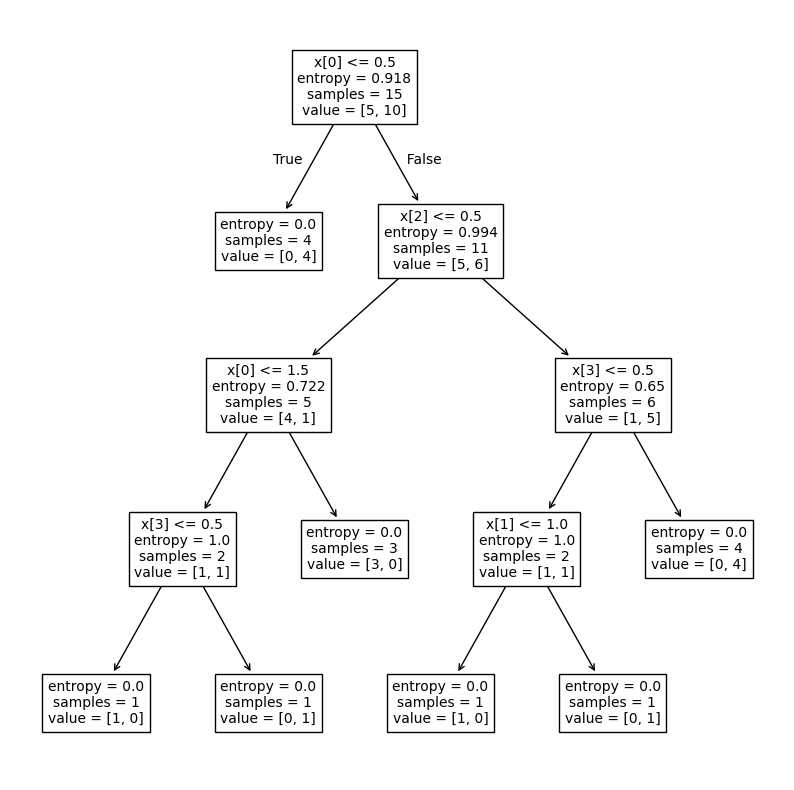

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
clf = DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(x_train, y_train)
clf.fit(x,y)
fig, ax = plt.subplots(figsize=(10,10))
tree.plot_tree(clf, fontsize=10)
plt.show()

In [10]:
# Predictions
x_pred = clf.predict(x_test)

In [11]:
from sklearn.metrics import classification_report

estimator = DecisionTreeClassifier(criterion="entropy")
estimator.fit(x_train, y_train)

x_pred = estimator.predict(x_test)

print(classification_report(y_test, x_pred))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.64      1.00      0.78         9

    accuracy                           0.64        14
   macro avg       0.32      0.50      0.39        14
weighted avg       0.41      0.64      0.50        14



c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [12]:
from sklearn.metrics import accuracy_score
print('Accuracy Score:', accuracy_score(y_test, x_pred))

Accuracy Score: 0.6428571428571429
